In [1]:
#Loading_Data
import pandas as pd
def load_data():
    #Concating both the valid data set and train to handel the data together
    valid_features_1 = pd.read_csv('valid_features.tsv', sep='\t')
    train_features_1 = pd.read_csv('train_features.tsv', sep='\t')
    data_acc = pd.concat([train_features_1,valid_features_1]).reset_index(drop=True)
    return data_acc

In [2]:
#splitting data for title and tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
def split_data_word(X):
    '''
    spliting the dataset to tile and tag features and vectorizing the data.
    Parameter X is X for traing features of the dataset and Y for Lables of the dataset
    
    '''
    #vectorizing title feature of the data
    vec_1= TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b')
    ti = vec_1.fit_transform(load_data()['title'].values.astype('U'))
    title_ds = pd.DataFrame(ti.toarray(), columns=vec_1.get_feature_names())
    #vectorizing the tag feature of the data
    vec_2 = TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b')
    ta = vec_2.fit_transform(load_data()['tag'].values.astype('U'))
    tag_ds = pd.DataFrame(ta.toarray(), columns=vec_2.get_feature_names())
    #concating both the features in one dataset
    tag_col = list(tag_ds.columns)
    for x in range(len(tag_col)):
        title_ds[tag_col[x]]=tag_ds[tag_col[x]].values
    #splitting the dataset into train and test
    if X == 'X':
        return title_ds
    elif X == 'Y':
        train_lable_1 = pd.read_csv('train_labels.tsv', sep='\t')
        lb_make = preprocessing.LabelEncoder()
        train_lable_1['genres'] = lb_make.fit_transform(train_lable_1['genres'])
        valid_labels = pd.read_csv('valid_labels.tsv', sep='\t')
        lb_make = preprocessing.LabelEncoder()
        valid_labels['genres'] = lb_make.fit_transform(valid_labels['genres'])
        Y = pd.concat([train_lable_1,valid_labels]).reset_index(drop=True)
        return Y




In [3]:
def split_data_AV(X):
    #getting the audio and video dataset from the dataframe
    AV_dataset = load_data().iloc[:,5:132]
    #Splitting the dataset. Parameter X is X for traing features of the dataset and Y for Lables of the dataset
    if X == 'X':
        return AV_dataset
    elif X == 'Y':
        train_lable_1 = pd.read_csv('train_labels.tsv', sep='\t')
        lb_make = preprocessing.LabelEncoder()
        train_lable_1['genres'] = lb_make.fit_transform(train_lable_1['genres'])
        valid_labels = pd.read_csv('valid_labels.tsv', sep='\t')
        lb_make = preprocessing.LabelEncoder()
        valid_labels['genres'] = lb_make.fit_transform(valid_labels['genres'])
        Y = pd.concat([train_lable_1,valid_labels]).reset_index(drop=True)
        return Y

In [4]:
def split_data(X):
    #Commbing all the data features in one. Parameter X is X for traing features of the dataset and Y for Lables of the dataset
    #AV dataset
    AV_dataset = load_data().iloc[:,5:132]
    #title and tag dataset
    vec_1= TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b')
    ti = vec_1.fit_transform(load_data()['title'].values.astype('U'))
    title_ds = pd.DataFrame(ti.toarray(), columns=vec_1.get_feature_names())
    #vectorizing the tag feature of the data
    vec_2 = TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b')
    ta = vec_2.fit_transform(load_data()['tag'].values.astype('U'))
    tag_ds = pd.DataFrame(ta.toarray(), columns=vec_2.get_feature_names())
    #concating both the features in one dataset
    tag_col = list(tag_ds.columns)
    for x in range(len(tag_col)):
        title_ds[tag_col[x]]=tag_ds[tag_col[x]].values

    '''combing the dataset to one'''
    AV_train_col = list(AV_dataset.columns)
    final_train_dataset = title_ds
    for x in range(len(AV_train_col)):
        final_train_dataset[AV_train_col[x]]=AV_dataset[AV_train_col[x]].values

    if X == 'X':
        return final_train_dataset
    elif X == 'Y':
        train_lable_1 = pd.read_csv('train_labels.tsv', sep='\t')
        lb_make = preprocessing.LabelEncoder()
        train_lable_1['genres'] = lb_make.fit_transform(train_lable_1['genres'])
        valid_labels = pd.read_csv('valid_labels.tsv', sep='\t')
        lb_make = preprocessing.LabelEncoder()
        valid_labels['genres'] = lb_make.fit_transform(valid_labels['genres'])
        Y = pd.concat([train_lable_1,valid_labels]).reset_index(drop=True)
        return Y



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="validation score")

    plt.legend(loc="best")
    return plt


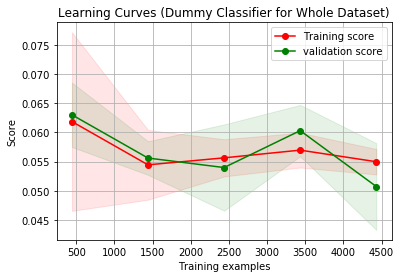

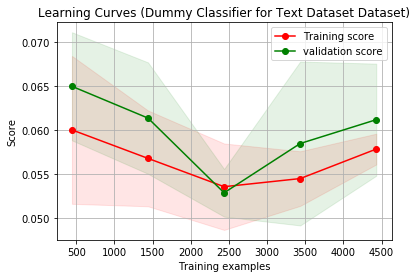

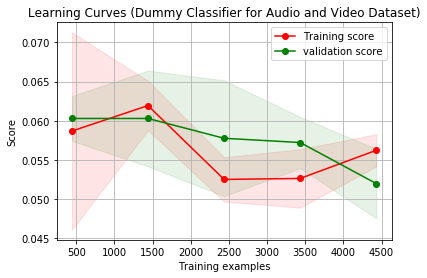

In [19]:
title = "Learning Curves (Dummy Classifier for Whole Dataset)"
dummy_clf = DummyClassifier(strategy='uniform')
#PLoting the learing for Dataset-1 which consist of all the features
plot_learning_curve(dummy_clf, title, split_data('X'), split_data('Y')['genres'])
#PLoting the learing for Dataset-2 which consist of Tag features
title = "Learning Curves (Dummy Classifier for Text Dataset Dataset)"
dummy_clf_W = DummyClassifier(strategy='uniform')
plot_learning_curve(dummy_clf_W, title, split_data_word('X'), split_data_word('Y')['genres'])
#PLoting the learing for Dataset-3 which consist of VIdeo and Audio features
title = "Learning Curves (Dummy Classifier for Audio and Video Dataset)"
dummy_clf_AV = DummyClassifier(strategy='uniform')
plot_learning_curve(dummy_clf_AV, title, split_data_AV('X'), split_data_AV('Y')['genres'])

plt.show()

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

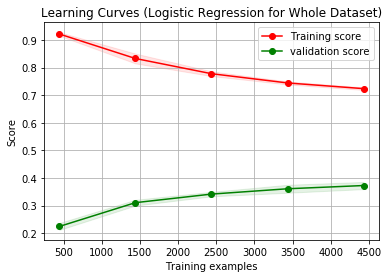

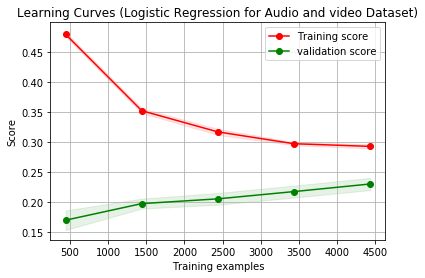

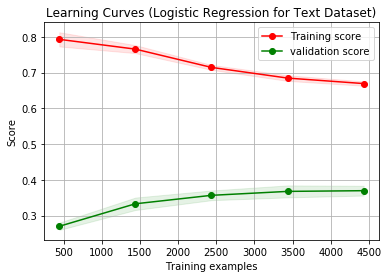

In [20]:
from sklearn.linear_model import LogisticRegression
#PLoting the learing for Dataset-1 which consist of all the features
title = "Learning Curves (Logistic Regression for Whole Dataset)"
clf = LogisticRegression(random_state=0,max_iter=15000)
plot_learning_curve(clf, title, split_data('X'), split_data('Y')['genres'])
#PLoting the learing for Dataset-3 which consist of Audio and Video features
title = "Learning Curves (Logistic Regression for Audio and video Dataset)"
clf_AV = LogisticRegression(random_state=0,max_iter=15000)
plot_learning_curve(clf_AV, title, split_data_AV('X'), split_data_AV('Y')['genres'])
#PLoting the learing for Dataset-2 which consist of title and tag features
title = "Learning Curves (Logistic Regression for Text Dataset)"
clf_w = LogisticRegression(random_state=0,max_iter=15000)
plot_learning_curve(clf_w, title, split_data_word('X'), split_data_word('Y')['genres'])

plt.show()

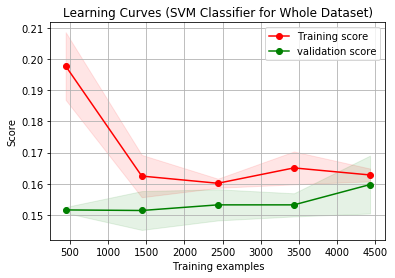

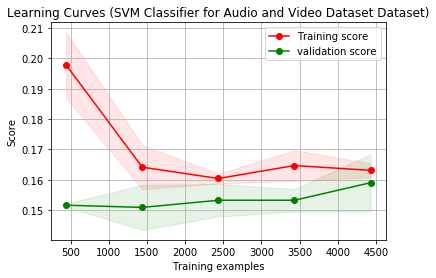

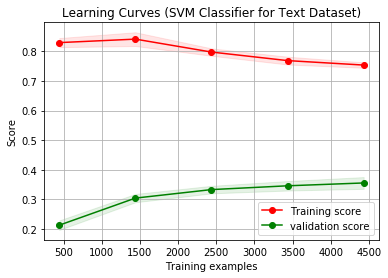

In [6]:
from sklearn import svm
#PLoting the learing for Dataset-1 which consist of all the features
title = "Learning Curves (SVM Classifier for Whole Dataset)"
clf_l_g_1 = svm.SVC(decision_function_shape='ovo')
plot_learning_curve(clf_l_g_1, title, split_data('X'), split_data('Y')['genres'])
#PLoting the learing for Dataset-1 which consist of Audio and Video features
title = "Learning Curves (SVM Classifier for Audio and Video Dataset Dataset)"
clf_l_g_1_AV = svm.SVC(decision_function_shape='ovo')
plot_learning_curve(clf_l_g_1_AV, title, split_data_AV('X'), split_data_AV('Y')['genres'])
#PLoting the learing for Dataset-1 which consist of TItle and Tag features
title = "Learning Curves (SVM Classifier for Text Dataset)"
clf_l_g_1_W = svm.SVC(decision_function_shape='ovo')
plot_learning_curve(clf_l_g_1_W, title, split_data_word('X'), split_data_word('Y')['genres'])

plt.show()

hello


C:\Users\kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

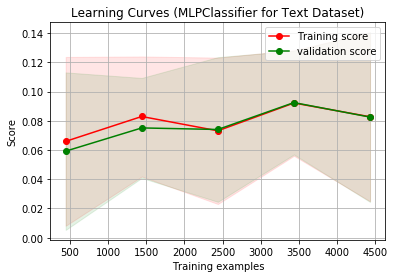

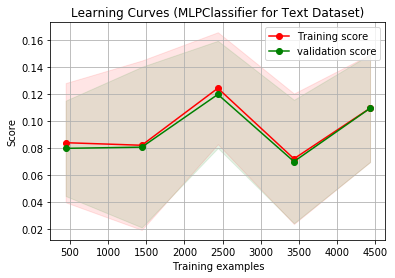

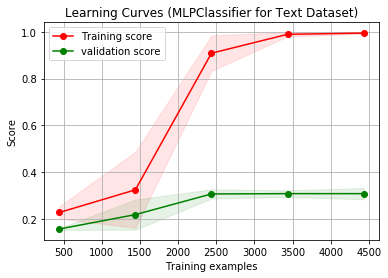

In [6]:
from sklearn.neural_network import MLPClassifier
print("hello")
title = "Learning Curves (MLPClassifier for Text Dataset)"
mlp_W = MLPClassifier(activation='logistic',hidden_layer_sizes=(500,),solver='sgd',learning_rate_init = 0.5,n_iter_no_change = 5)
#PLoting the learing for Dataset-1 which consist of all the features
plot_learning_curve(mlp_W, title, split_data('X'), split_data('Y')['genres'])
#PLoting the learing for Dataset-1 which consist of Audio and Video features
plot_learning_curve(mlp_W, title, split_data_AV('X'), split_data_AV('Y')['genres'])
#PLoting the learing for Dataset-1 which consist of Title and Tag features
plot_learning_curve(mlp_W, title, split_data_word('X'), split_data_word('Y')['genres'])
plt.show()